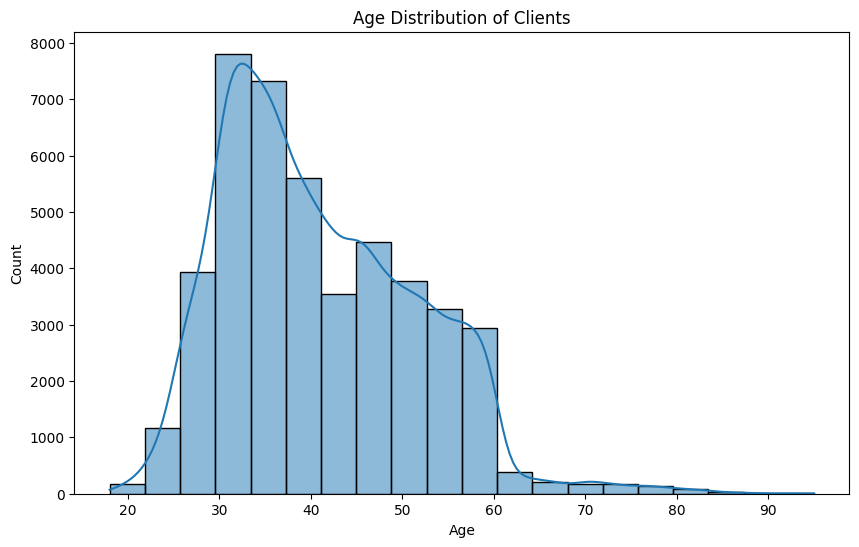

Age Statistics:
count    45216.000000
mean        40.938186
std         10.621249
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


In [ ]:
#question1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('banking_data.csv')
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print("Age Statistics:")
print(df['age'].describe())

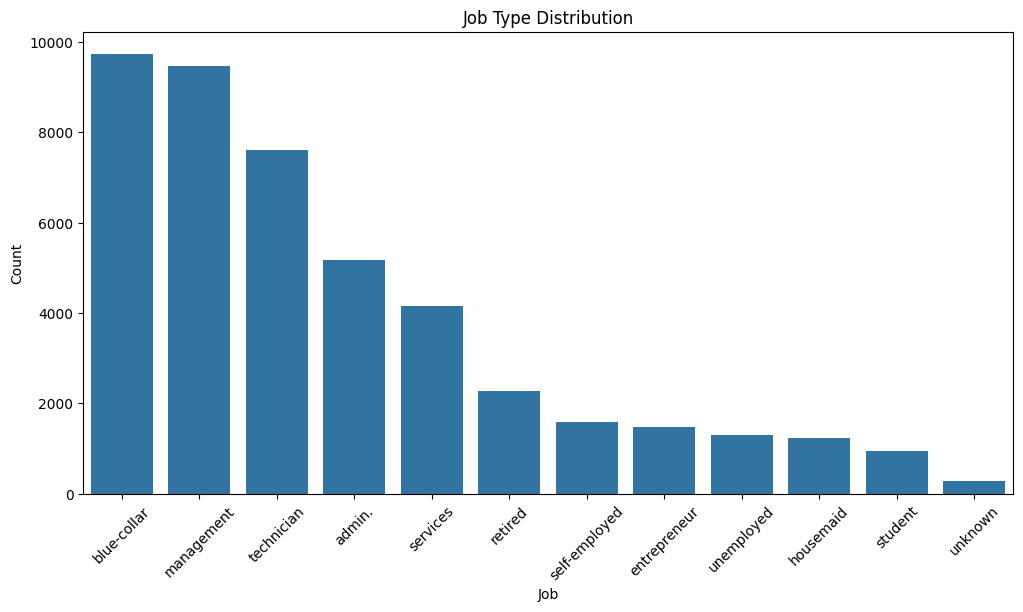

In [ ]:
#question2
plt.figure(figsize=(12, 6))
job_counts = df['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Job Type Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

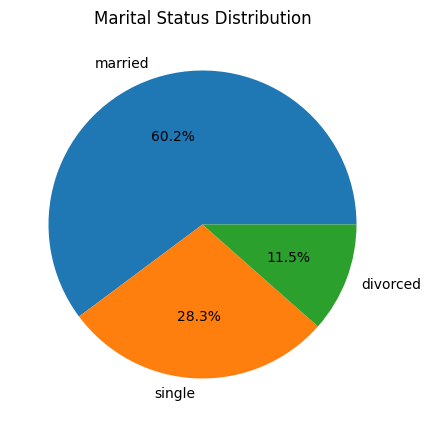

In [ ]:
#question3
plt.figure(figsize=(8, 5))
marital_counts = df['marital'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

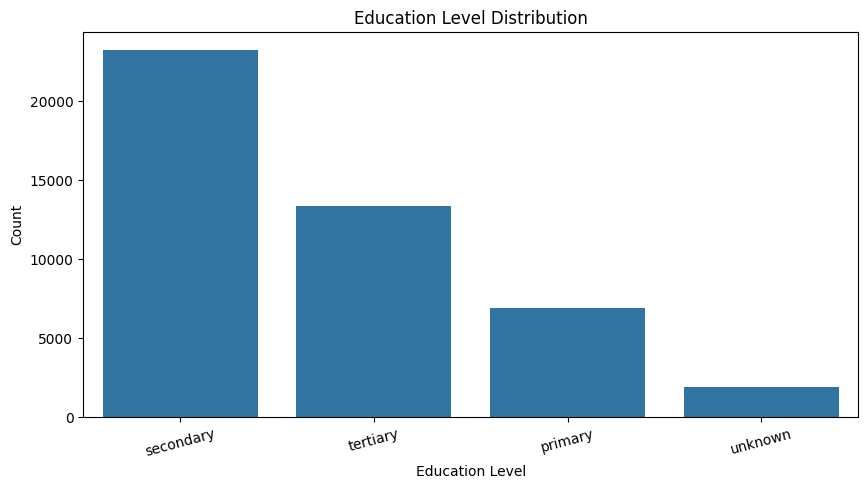

In [ ]:
#question4
plt.figure(figsize=(10, 5))
edu_counts = df['education'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

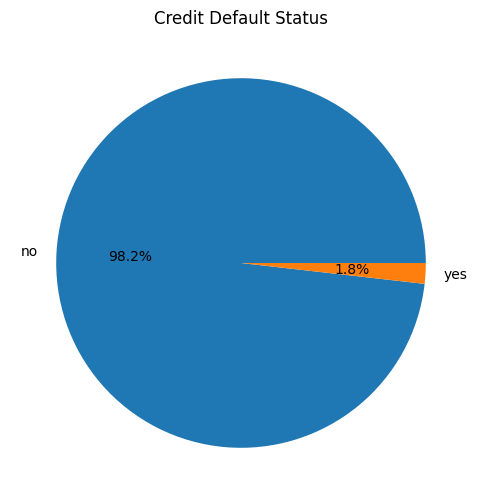

In [ ]:
#question5
default_counts = df['default'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%')
plt.title('Credit Default Status')
plt.show()

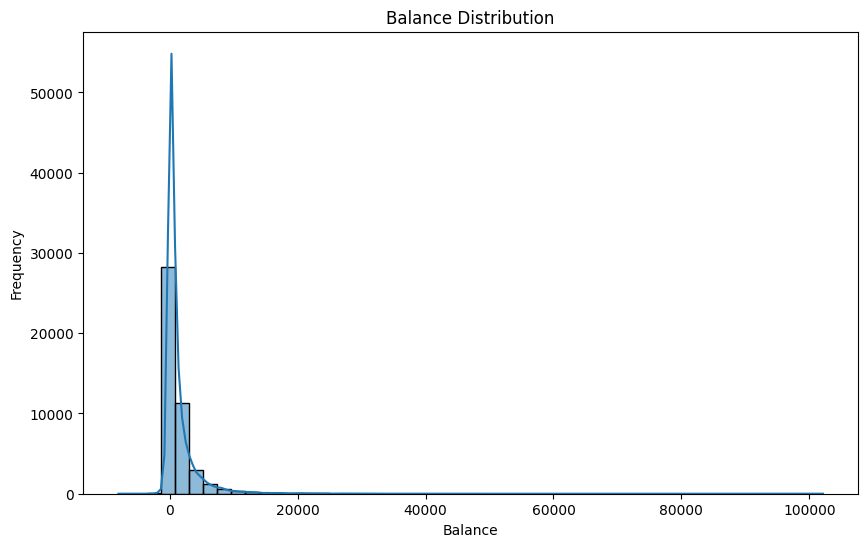

In [ ]:
#question6
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=50, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

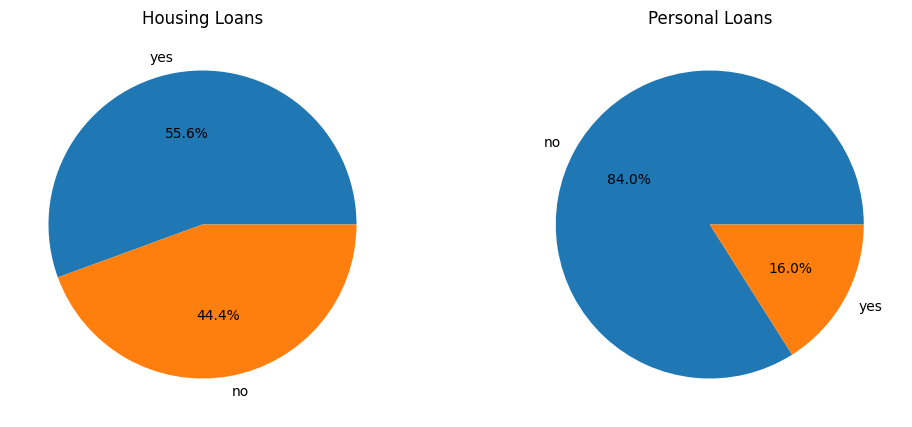

In [ ]:
#Question7&8
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

housing_counts = df['housing'].value_counts()
ax1.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%')
ax1.set_title('Housing Loans')

loan_counts = df['loan'].value_counts()
ax2.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
ax2.set_title('Personal Loans')
plt.show()

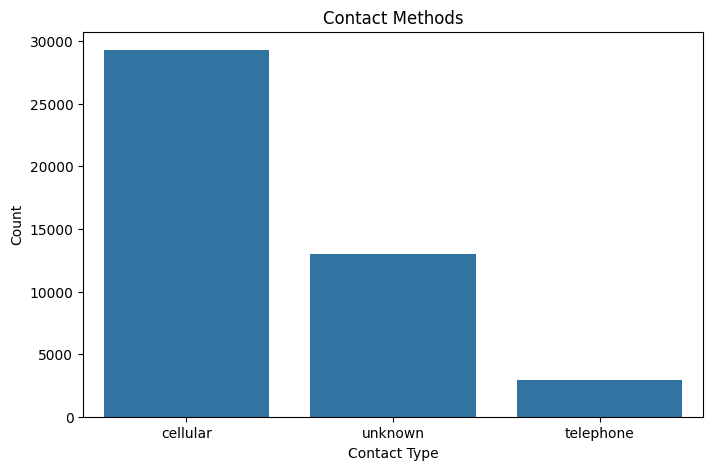

In [ ]:
#question9
contact_counts = df['contact'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=contact_counts.index, y=contact_counts.values)
plt.title('Contact Methods')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()

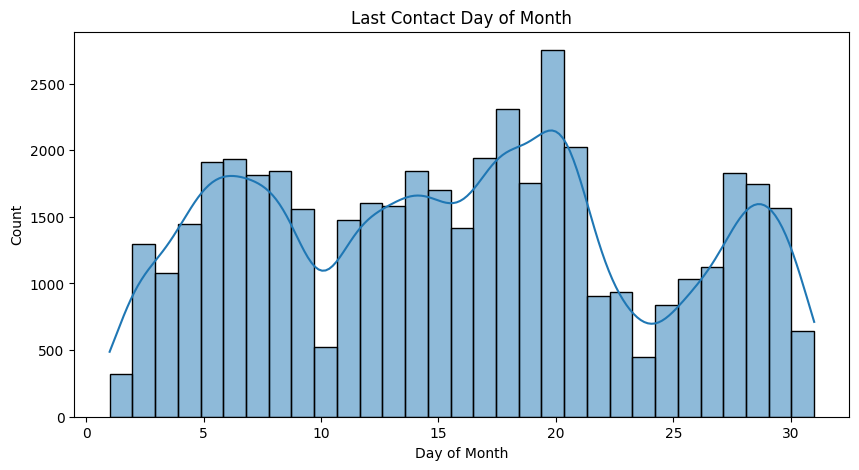

In [ ]:
#question10
plt.figure(figsize=(10, 5))
sns.histplot(df['day'], bins=31, kde=True)
plt.title('Last Contact Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.show()

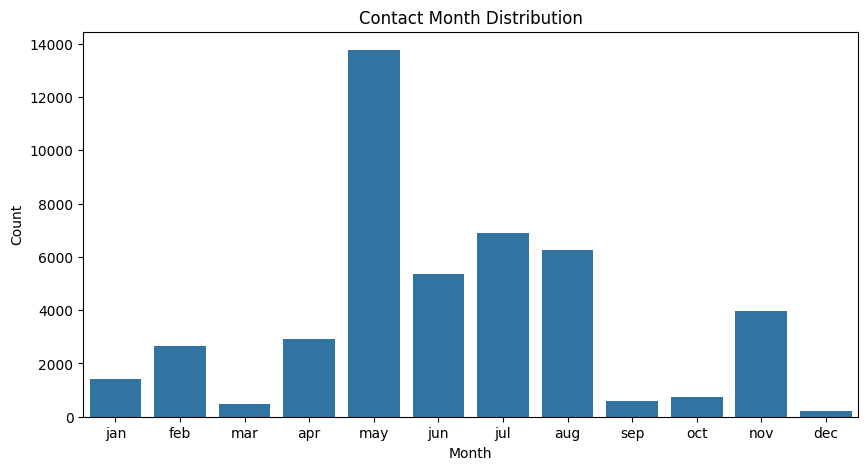

In [ ]:
#question11
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_counts = df['month'].value_counts().reindex(month_order).dropna()

plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Contact Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

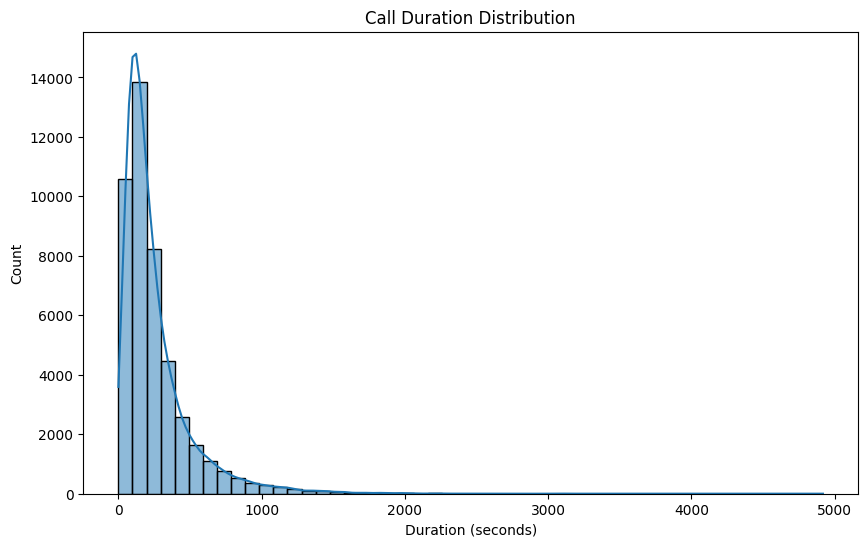

In [ ]:
#question12
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Call Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

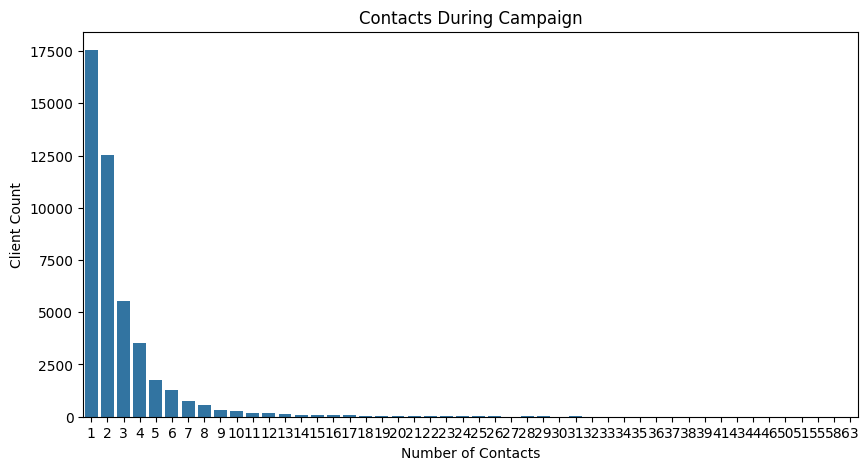

In [ ]:
#question13
plt.figure(figsize=(10, 5))
sns.countplot(x='campaign', data=df)
plt.title('Contacts During Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Client Count')
plt.show()

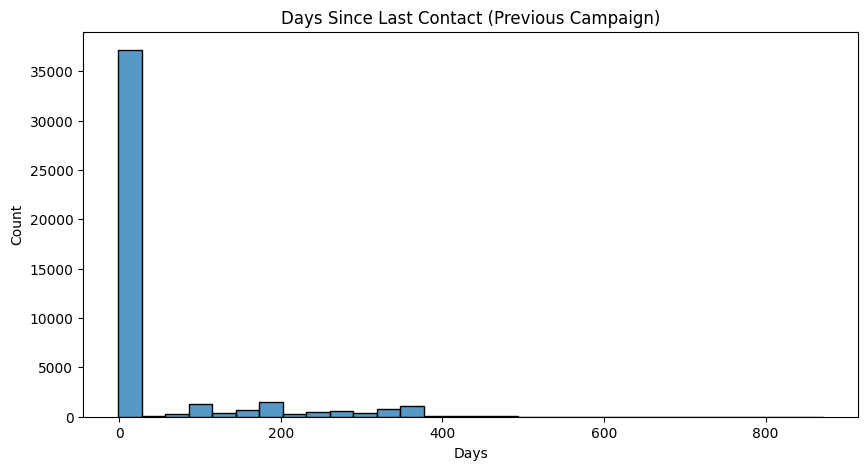

In [ ]:
#question14
plt.figure(figsize=(10, 5))
sns.histplot(df['pdays'], bins=30)
plt.title('Days Since Last Contact (Previous Campaign)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

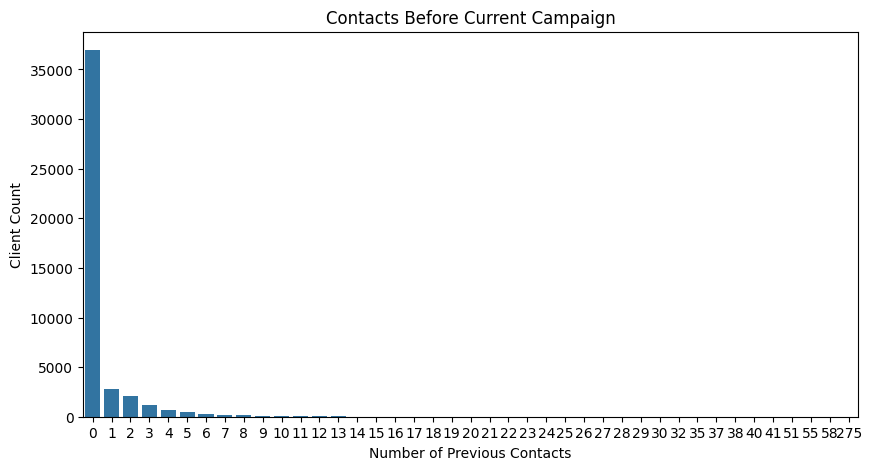

In [ ]:
#question 15
plt.figure(figsize=(10, 5))
sns.countplot(x='previous', data=df)
plt.title('Contacts Before Current Campaign')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Client Count')
plt.show()

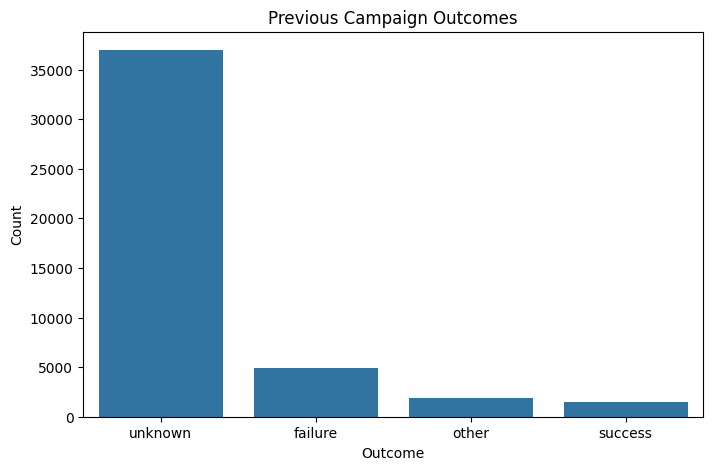

In [ ]:
#question16
plt.figure(figsize=(8, 5))
outcome_counts = df['poutcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Previous Campaign Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

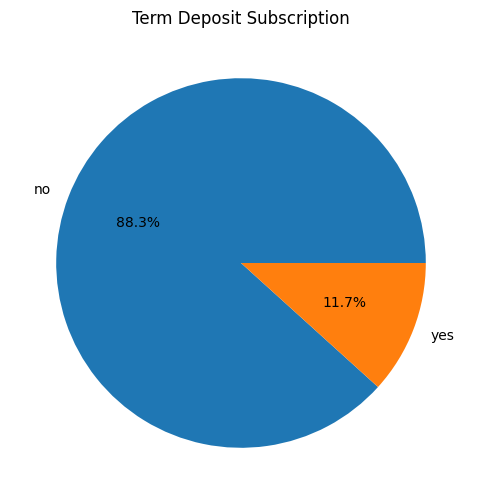

In [ ]:
#question17
subscription_counts = df['y'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%')
plt.title('Term Deposit Subscription')
plt.show()

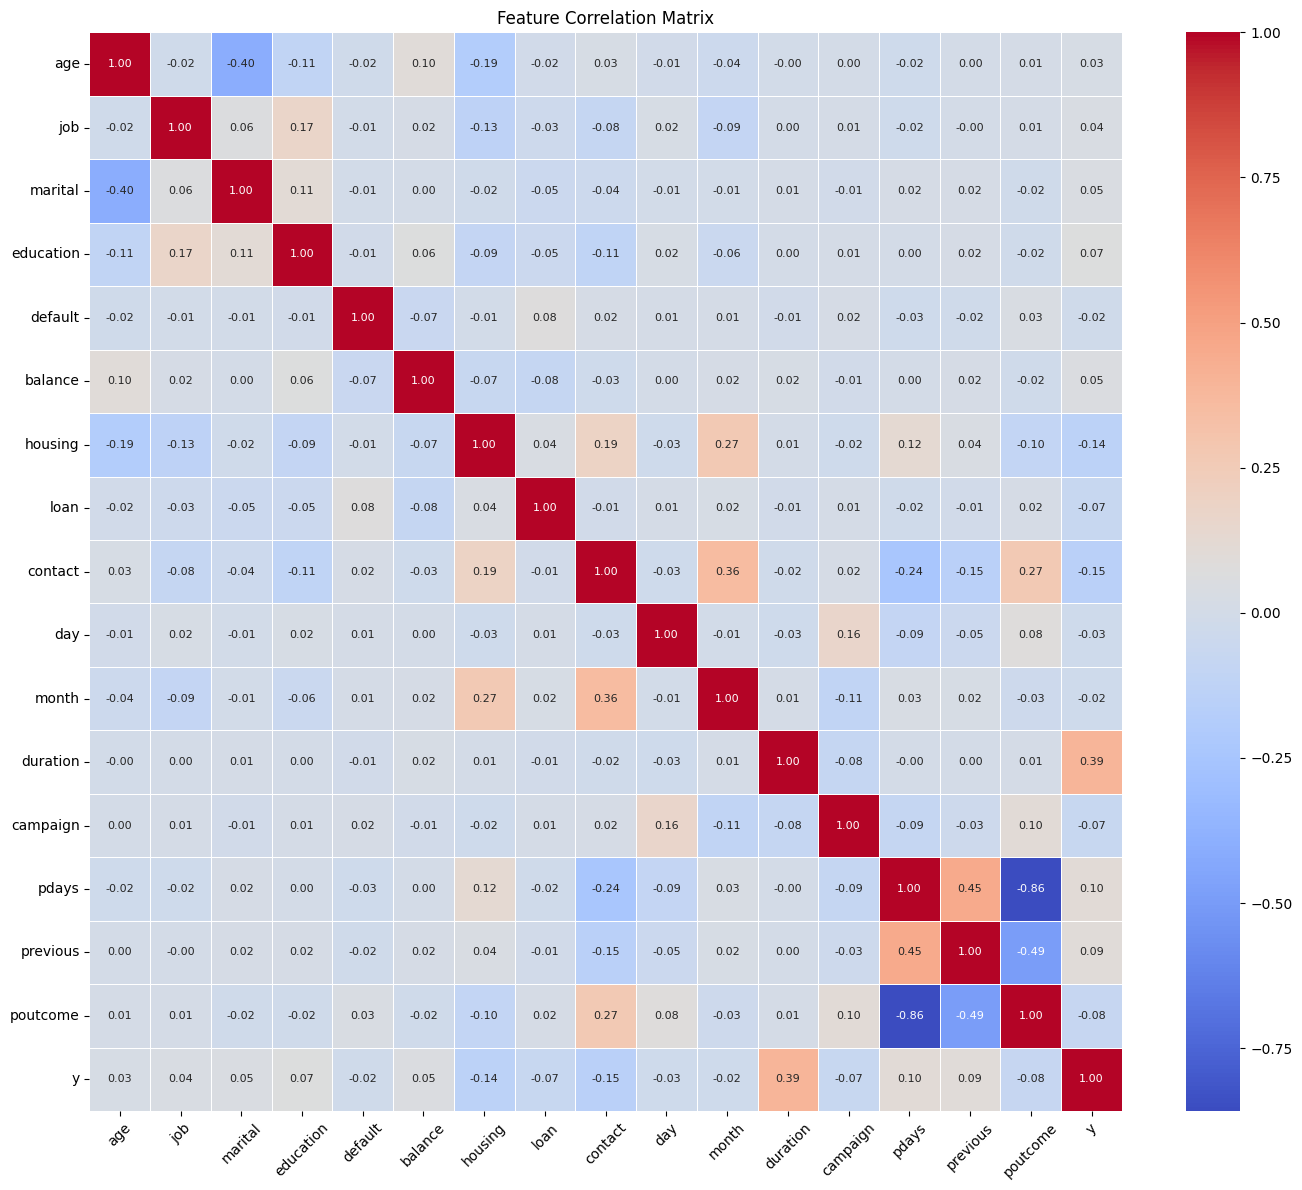

Top 10 Correlations with Term Deposit Subscription:
duration     0.394387
pdays        0.103699
previous     0.093576
education    0.066270
balance      0.052821
marital      0.045392
job          0.040445
age          0.025648
default     -0.022451
month       -0.024108
Name: y, dtype: float64


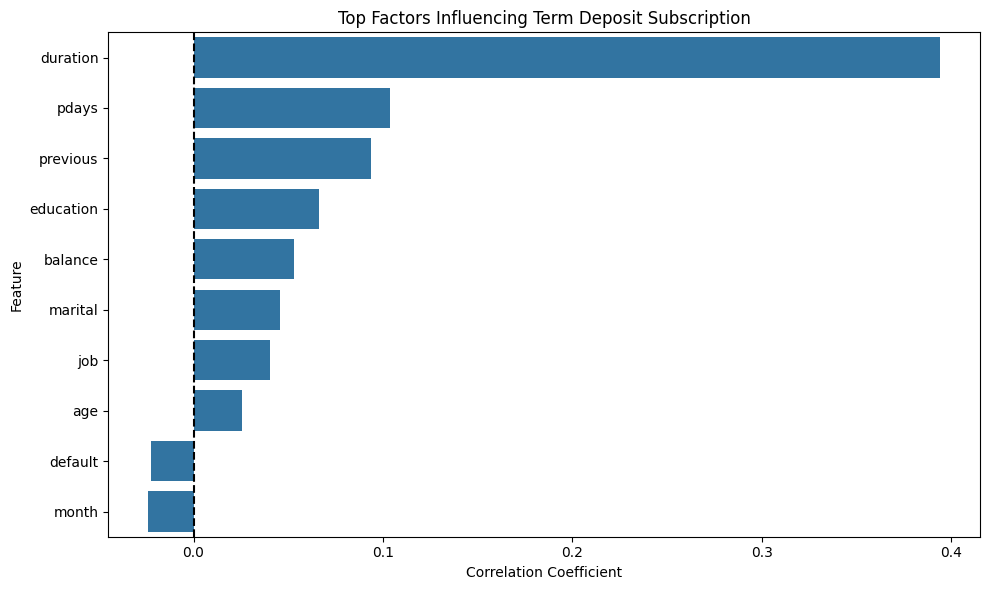

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('banking_data.csv')

# Drop redundant columns and problematic date column
df = df.drop(['day_month', 'marital_status'], axis=1)  # marital_status is redundant with marital

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert target variable to binary
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={'size': 8}, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show top correlations with subscription rate
print("Top 10 Correlations with Term Deposit Subscription:")
top_correlations = corr_matrix['y'].sort_values(ascending=False).drop('y').head(10)
print(top_correlations)

# Plot top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top Factors Influencing Term Deposit Subscription')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()